# DATA SCIENCE JOB MARKET ANALYSIS

## 1. Web Scraping using Selenium

In [46]:
import sys
sys.path.append('C:\\Users\\sushm.SUSHMAA\\AppData\\Roaming\\Python\\Python39\\site-packages')


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# Open the Naukri website
driver.get("https://www.naukri.com/")

# Typing "Web Developer" in the search bar and searching
search = driver.find_element(By.CSS_SELECTOR, "#root > div.qsbWrapper > div > div > div.keywordSugg > div > div > div > div:nth-child(1) > div > input")
search.send_keys("Data Scientist")
search.send_keys(Keys.RETURN)

# Creating a dictionary for storing the information after scraping
job_data = {
    "roles": [],
    "companies": [],
    "locations": [],
    "experience": [],
    "skills": []
} 

#iterate over first 50 pages; each page contains 20 results
#for each job we will scrape the role,company, location, experience, skills
for i in range(1, 51):
    
    driver.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))
    # Wait for the job elements to be present on the page
    xpath2 = '//*[@id="listContainer"]/div[2]/div/div[1]/div/div[1]/a'
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, xpath2))
    )

    # Locate all job elements on the page
    job_listings = driver.find_elements(By.XPATH, '//*[@id="listContainer"]/div[2]/div/div/div')

    # Iterate over each job element
    for job in job_listings:
        driver.execute_script("arguments[0].scrollIntoView(true);", job)

        # XPaths for job details
        role_xpath = './div[1]/a'
        exp_xpath = './div[3]/div/span[1]/span'
        company_xpath = '//*[@id="listContainer"]/div[2]/div/div[1]/div/div[2]/span/a[1]'
        loc_xpath = './div[3]/div/span[3]/span/span'
        skill_xpath = './div[5]/ul/li'

        try:
            # Extract job details using the corresponding XPaths
            role = job.find_element(By.XPATH, role_xpath).text
            exp = job.find_element(By.XPATH, exp_xpath).text
            company = job.find_element(By.XPATH, company_xpath).text
            locations = job.find_elements(By.XPATH, loc_xpath)
            skills = job.find_elements(By.XPATH, skill_xpath)

            # Convert location and skills to lists
            location_list = ' '.join([loc.text for loc in locations])
            skills_list = '\n'.join([skill.text.lower() for skill in skills])

            # Append data to the dictionary
            job_data["roles"].append(role)
            job_data["companies"].append(company)
            job_data["locations"].append(location_list)
            job_data["experience"].append(exp)
            job_data["skills"].append(skills_list)

        except Exception as e:
            print(f"Error scraping job: {e}")
            continue

            
# Close the browser window
driver.quit()

# Convert the dictionary to a DataFrame
data = pd.DataFrame(job_data)

# Save DataFrame to CSV
data.to_csv('Datascience_data.csv', index=False)




In [1]:
import pandas as pd
df=pd.read_csv("DataScience_data.csv")

## 2. Pre-processing

In [2]:

df.tail(5)

,roles,companies,locations,experience,skills
995,Senior Data Scientist,Numentica,Remote,7-12 Yrs,data science\npython\ndata analysis\nscience\n...
996,"Sr. Data Scientist (AI/ML,GenAI)",Numentica,"Hybrid - Pune, Chennai, Bengaluru",4-9 Yrs,machine learning\ndata science\ngen ai\nai/ml\...
997,Senior Data Scientist,Numentica,Bengaluru,4-9 Yrs,computer science\ndata analysis\nbackend\nbidd...
998,Sr Data Scientist,Numentica,"Kolkata, Mumbai, New Delhi, Hyderabad, Pune, C...",3-7 Yrs,python\nnatural language processing\nneural ne...
999,Sr Data Scientist,Numentica,"Hyderabad, Bengaluru",10-20 Yrs,aws cloud\npython\npyspark\nmachine learning\n...


In [3]:
#lets check if our data have any null values
df.isna().sum()

roles         0
companies     0
locations     0
experience    0
skills        5
dtype: int64

In [4]:
#lets drop the missing values
df=df.dropna()

In [5]:
#lets check if our data have any dupplicate data
df[df.duplicated(subset=["roles","companies","experience","locations","skills"])].shape

(2, 5)

In [6]:
"""print("Before dropping duplicates : ",df.shape)
df.drop_duplicates(keep="first",inplace=True)
print("After dropping duplicates : "df.shape)"""

'print("Before dropping duplicates : ",df.shape)\ndf.drop_duplicates(keep="first",inplace=True)\nprint("After dropping duplicates : "df.shape)'

In [7]:
#lets lower case all the strings to avoid redundancy
df=df.apply(lambda x: x.astype(str).str.lower())

#there are more than one location and skill are attcahed to each job, so lets split locations and jobs.
df.skills=[skill.split("\n") for skill in df.skills]
df.locations=[location.split(",") for location in df.locations]
df[15:20]

,roles,companies,locations,experience,skills
15,data scientist iii,ey,[bengaluru],4-9 yrs,"[networking, coding, troubleshooting, informat..."
16,data scientist: ai/ml engineer,ey,[kochi],5-7 yrs,"[multithreading, rest, python, data analytics,..."
17,data scientist: ai/ml engineer,ey,[kochi],3-6 yrs,"[docker, multithreading, python, data analytic..."
18,data scientist: ai/ml engineer,ey,[kochi],7-9 yrs,"[multithreading, rest, python, data analytics,..."
19,battery data scientist,ey,[bengaluru],3-5 yrs,"[c++, simulation, coding, thermal, perl, simul..."


## 3. Exploratory Data analysis

### 3.1. Location wise Data science jobs


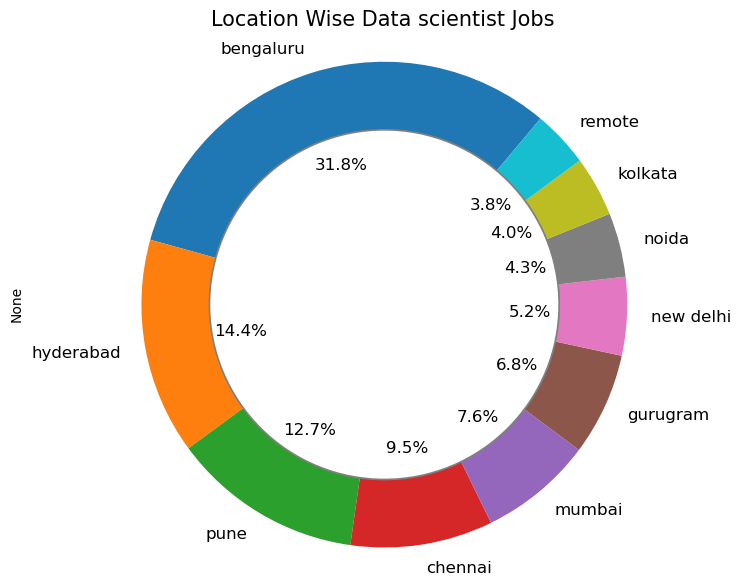

In [8]:
import matplotlib.pyplot as plt

df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(9,7),startangle=50,autopct='%1.1f%%',fontsize=12)
plt.title("Location Wise Data scientist Jobs",fontsize=15)

#https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

##### Observations:
1. Bangalore tops the list with almost 31.8% of the total jobs.
2. Top three cities Bangalore,Mumbai, Hyderabad and Pune constitues almost 58.9% of the total jobs.

### 3.2 Companies with more Data science openings

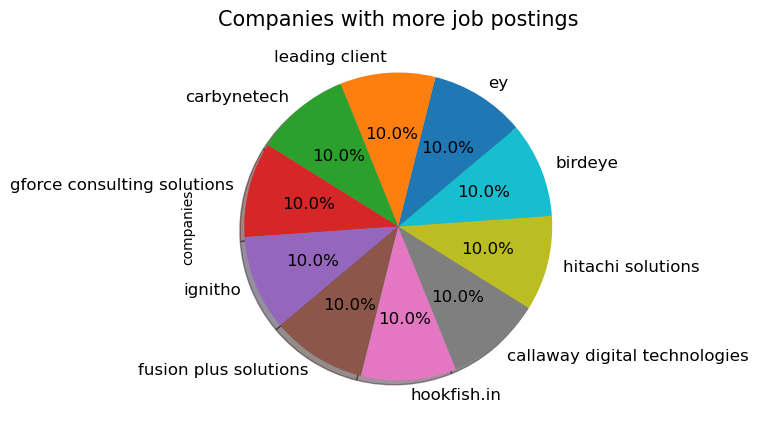

In [9]:
df["companies"].value_counts()[:10].plot.pie(figsize=(8,5),shadow=True, startangle=40,autopct='%1.1f%%',fontsize=12)
plt.title("Companies with more job postings",fontsize=15)
plt.show()

### 3.3 Data Scientist roles in demand

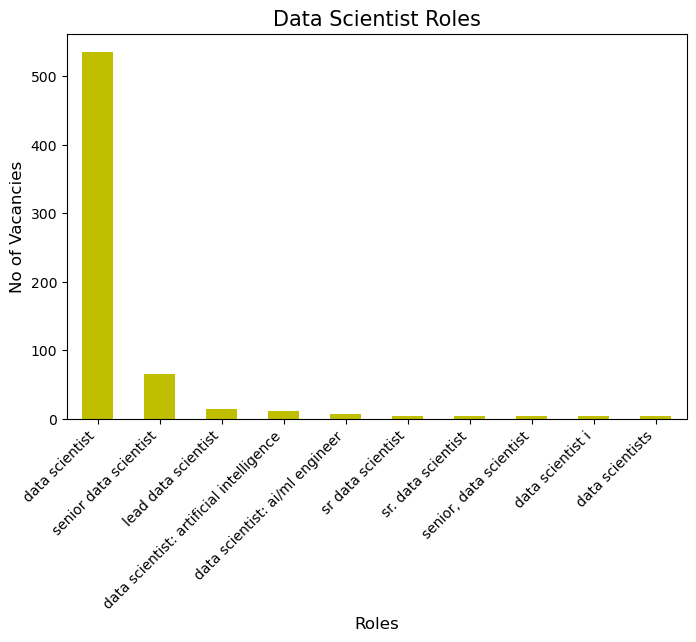

In [109]:
### Roles
df["roles"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")#(figsize=(10,10),explode=[0.05,0.04,0.05,0,0,0,0,0,0,0],shadow=True, startangle=50,autopct='%1.1f%%')
plt.xticks(rotation=45,ha='right')
plt.title("Data Scientist Roles",fontsize=15)
plt.ylabel("No of Vacancies",fontsize=12)
plt.xlabel("Roles",fontsize=12)
plt.show()

### 3.4. Desired Experience for Data science jobs

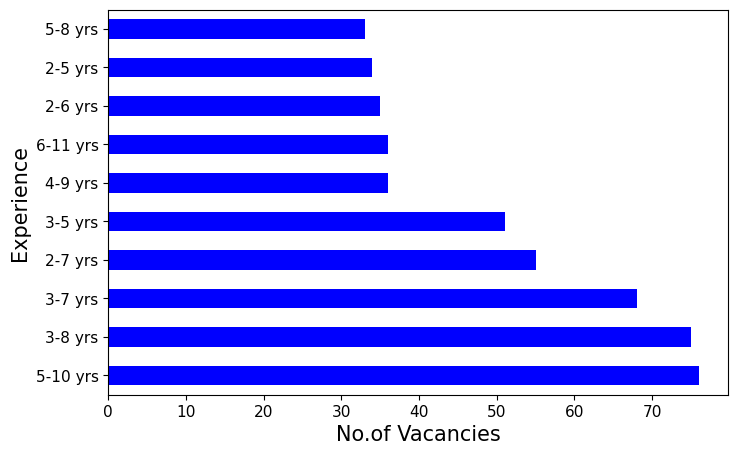

In [110]:
df["experience"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=11,color="b")
plt.xlabel("No.of Vacancies",fontsize=15)
plt.ylabel("Experience",fontsize=15)
plt.show()

### 3.5. Skills required for a Data science job

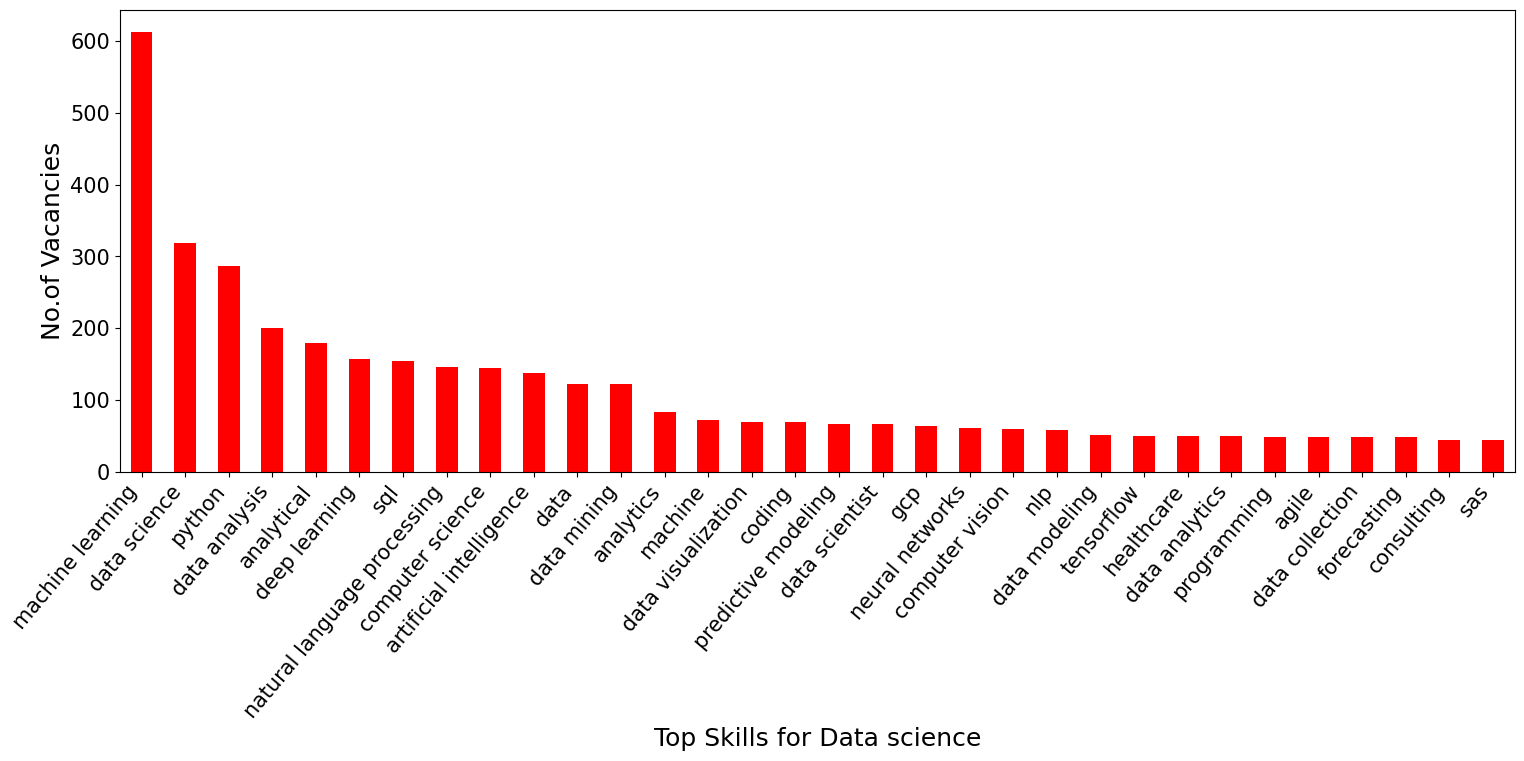

In [111]:
df.skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
# plt.title("Top Skills for Data science",fontsize=15)
plt.ylabel("No.of Vacancies",fontsize=18)
plt.xlabel("Top Skills for Data science",fontsize=18)
plt.show()